In [1]:
import sys
import regions
import numpy as np
import PIL

import importlib as imp

from regions import Regions

from astropy.io import fits
from astropy.wcs import WCS
from astropy.wcs.utils import proj_plane_pixel_scales
from astropy.visualization import simple_norm

import matplotlib.pyplot as plt
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb

from astropy.nddata import Cutout2D
from astropy.coordinates import SkyCoord
from astropy import units as u


from spectral_cube import SpectralCube
from spectral_cube import Projection

import regions

from astropy.visualization.wcsaxes import add_scalebar
from astropy.visualization.wcsaxes import add_beam

import random as rand

from astropy.table import Table

from matplotlib.patches import Rectangle

from pvextractor import extract_pv_slice, Path


/blue/adamginsburg/adamginsburg/repos/pvextractor/pvextractor/pvregions.py:43: SyntaxWarning: invalid escape sequence '\('
  coordre = re.compile("^[a-z]*\((.*)\)")


In [2]:
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['image.origin'] = 'lower'

In [3]:
# imp.reload()

In [4]:
cd ..

/blue/adamginsburg/adamginsburg/jwst/cloudc/code/lactea-filament/lactea-filament


In [5]:
import moment_maker as mm
import cutout_manager as cm

In [6]:
pos_ctr = SkyCoord('17:46:20.9063719501', '-28:37:51.6942550990', unit=(u.hourangle, u.deg))


In [7]:
basepath = '/orange/adamginsburg/jwst/cloudc/'

# ACES CS 2-1 PV Diagram

In [54]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

In [26]:
whole_pv_CS = fits.open('/orange/adamginsburg/ACES/mosaics/cubes/moments/CS21_CubeMosaic_PV_max.fits')

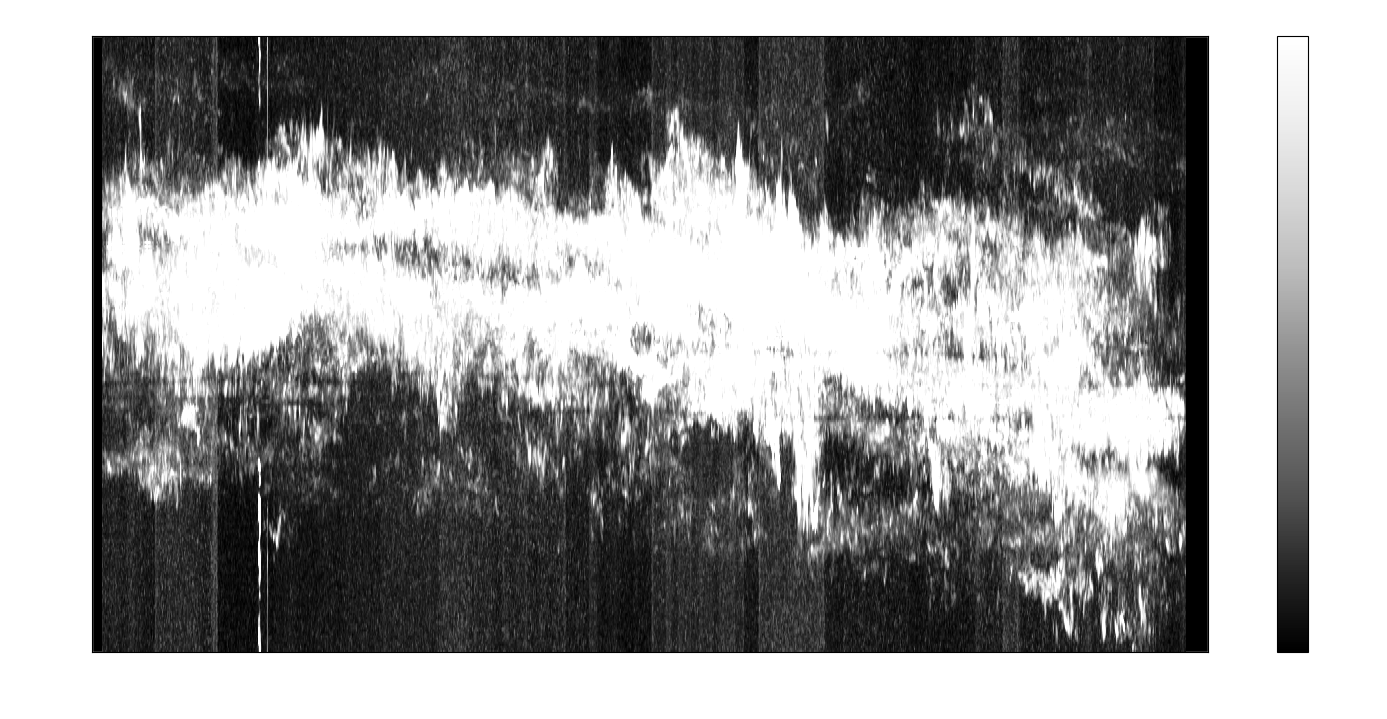

In [58]:
fig = plt.figure(figsize=(18, 8))
ax = plt.subplot(111, projection=WCS(whole_pv_CS[0].header))
norm = simple_norm(whole_pv_CS[0].data, stretch='linear', min_percent=1, max_percent=80)
im = ax.imshow(whole_pv_CS[0].data, cmap='Greys_r', norm=norm)

#ax.scatter(pos_ctr.galactic.l, (-55*u.km/u.s).to(u.m/u.s), transform=ax.get_transform('world'), marker='x', color='red', s=10)
#ax.scatter(pos_cloudc1.galactic.l, (40*u.km/u.s).to(u.m/u.s), transform=ax.get_transform('world'), marker='x', color='red', s=10)
#ax.scatter(pos_cloudc2.galactic.l, (10*u.km/u.s).to(u.m/u.s), transform=ax.get_transform('world'), marker='x', color='red', s=10)
#ax.scatter(pos_cloudd.galactic.l, (30*u.km/u.s).to(u.m/u.s), transform=ax.get_transform('world'), marker='x', color='red', s=10)


ax1 = ax.coords[1]
ax1.set_format_unit(u.km/u.s)

#reg = regions.RectangleSkyRegion(pos_ctr.galactic.l, 2.5*u.arcmin, (4*u.km/u.s).to(u.m/u.s))
#pixel_region = reg.to_pixel(WCS(whole_pv_CS[0].header))
#pixel_region.plot(ax=ax, color='red', linewidth=0.5)

#rect = Rectangle((pos_ctr.galactic.l.value-(2.5*u.arcmin).to(u.deg).value/2, (-57*u.km/u.s).to(u.m/u.s).value), 
#                 (2.5*u.arcmin).to(u.deg).value, (4*u.km/u.s).to(u.m/u.s).value, 
#                 linewidth=1, edgecolor='r', facecolor='none', transform=ax.get_transform('world'))
#ax.add_patch(rect)

ax.set_xlabel('Galactic Longitude', fontsize=16)
ax.set_ylabel('Velocity [km/s]', fontsize=16)
ax.set_title('CS 2-1', fontsize=16)

ax.set_aspect('auto')

ax.set_facecolor('k')

cbar = plt.colorbar(im)
cbar.set_label('Intensity [K]', fontsize=16)
#plt.savefig('/orange/adamginsburg/jwst/cloudc/figures/CS21_PV_BostonACES.png', dpi=300, bbox_inches='tight', transparent=True)

## Wide 12CO Moment 0

In [5]:
fn_12CO = '/orange/adamginsburg/cmz/nobeyama/12CO-2.BEARS.FITS'


In [6]:
mom0_12co = mm.get_moment0(1.152712040000E+11*u.Hz, -60*u.km/u.s, -50*u.km/u.s, fn_12CO)

In [9]:
reg_fil = Regions.read(f'{basepath}/regions_/filament_short.reg')[0]

Text(0, 0.5, 'K')

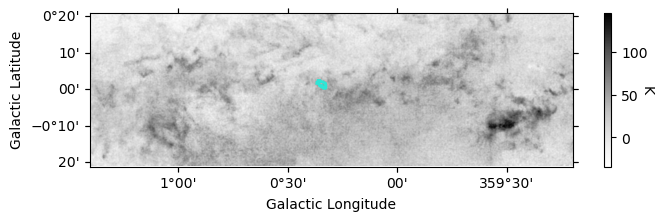

In [11]:
fig = plt.figure(figsize=(8, 2))
ax = plt.subplot(111, projection=WCS(mom0_12co.header))
im = ax.imshow(mom0_12co.data, cmap='Greys')

reg_fil.to_pixel(WCS(mom0_12co.header)).plot()

ax.set_xlabel('Galactic Longitude')
ax.set_ylabel('Galactic Latitude')

cbar = plt.colorbar(im, ax=ax)
cbar.ax.set_ylabel('K', rotation=-90)

In [14]:
cutout_12co = mm.get_mom0_cutout(pos_ctr, 0.5*u.deg, 0.5*u.deg, mom0_12co)

Text(0, 0.5, 'K')

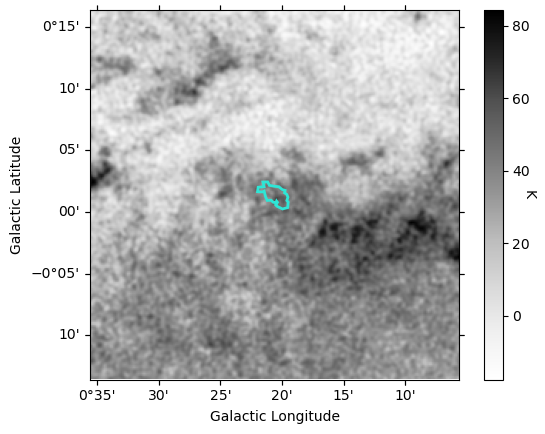

In [15]:
ax = plt.subplot(111, projection=cutout_12co.wcs)
im = ax.imshow(cutout_12co.data, cmap='Greys')
reg_fil.to_pixel(cutout_12co.wcs).plot()

ax.set_xlabel('Galactic Longitude')
ax.set_ylabel('Galactic Latitude')

cbar = plt.colorbar(im, ax=ax)
cbar.ax.set_ylabel('K', rotation=-90)

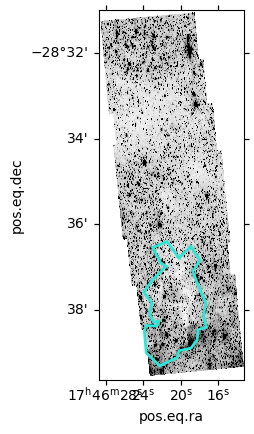

In [16]:
fn_405 = '/orange/adamginsburg/jwst/cloudc/images/F405_reproj_merged-fortricolor.fits'
hdu_405 = fits.open(fn_405)

ax = plt.subplot(111, projection=WCS(hdu_405[0].header))
ax.imshow(hdu_405[0].data, cmap='Greys', vmin=0, vmax=50)

reg_fil.to_pixel(WCS(hdu_405[0].header)).plot()

# 12CO PV

In [61]:
max_CS = fits.open('/orange/adamginsburg/ACES/mosaics/cubes/moments/CS21_CubeMosaic_max.fits')

In [62]:
reg_ACES = Regions.read(f'{basepath}/regions_/ACES_reg.reg')#[0]

In [63]:
cube = SpectralCube.read(fn_12CO, format='fits')

In [64]:
subcube = cube.subcube_from_regions(reg_ACES)

In [65]:
mom0_12CO = subcube.moment0(axis=0)

In [66]:
pv_12co = subcube.to(u.K).max(axis=1)

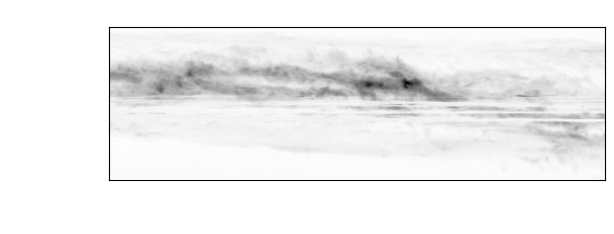

In [67]:
ax = plt.subplot(111, projection=pv_12co.wcs)
im = ax.imshow(pv_12co.data, cmap='Greys')

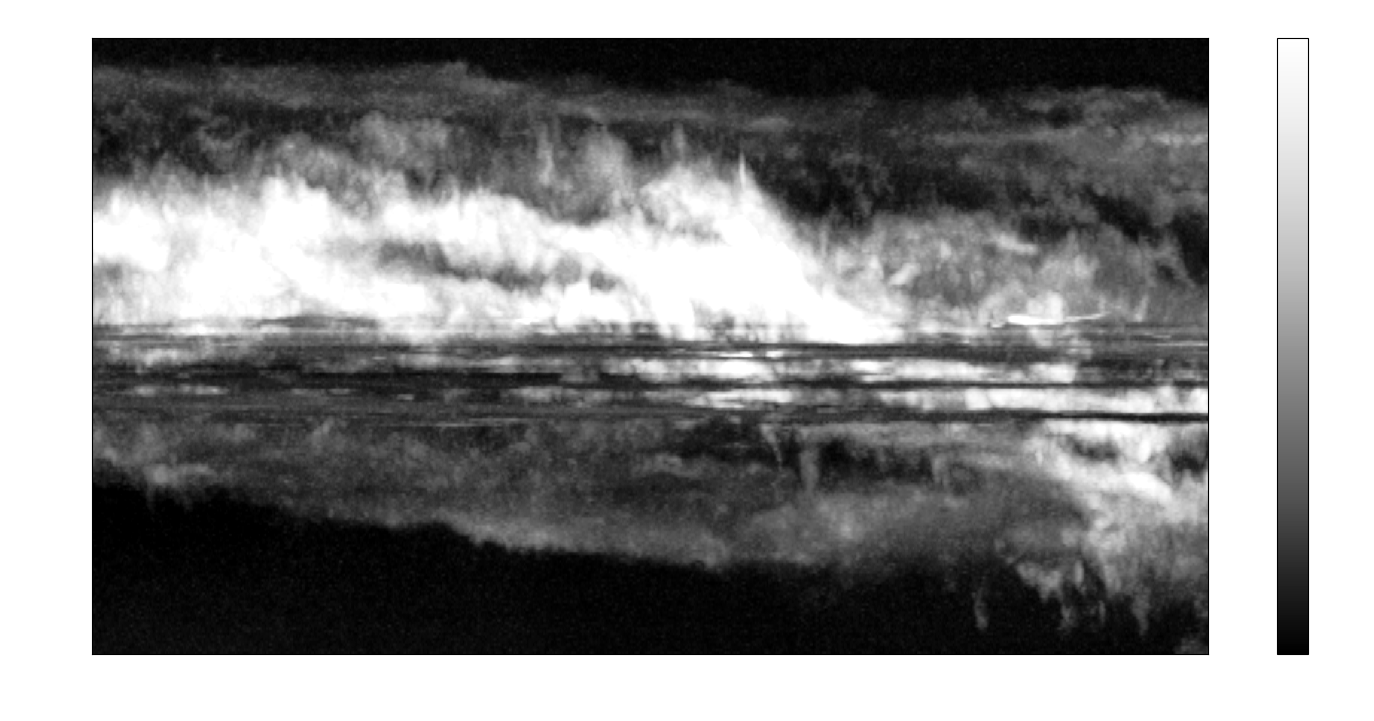

In [68]:
fig = plt.figure(figsize=(18, 8))
ax = plt.subplot(111, projection=pv_12co.wcs)
norm = simple_norm(pv_12co.data, stretch='linear', min_percent=1, max_percent=95)
im = ax.imshow(pv_12co.data, cmap='Greys_r', norm=norm)

#ax.scatter(pos_ctr.galactic.l, (-55*u.km/u.s).to(u.m/u.s), transform=ax.get_transform('world'), marker='x', color='red', s=10)
#ax.scatter(pos_cloudc1.galactic.l, (40*u.km/u.s).to(u.m/u.s), transform=ax.get_transform('world'), marker='x', color='red', s=10)
#ax.scatter(pos_cloudc2.galactic.l, (10*u.km/u.s).to(u.m/u.s), transform=ax.get_transform('world'), marker='x', color='red', s=10)
#ax.scatter(pos_cloudd.galactic.l, (30*u.km/u.s).to(u.m/u.s), transform=ax.get_transform('world'), marker='x', color='red', s=10)


ax1 = ax.coords[1]
ax1.set_format_unit(u.km/u.s)

#reg = regions.RectangleSkyRegion(pos_ctr.galactic.l, 2.5*u.arcmin, (4*u.km/u.s).to(u.m/u.s))
#pixel_region = reg.to_pixel(WCS(whole_pv_CS[0].header))
#pixel_region.plot(ax=ax, color='red', linewidth=0.5)

#rect = Rectangle((pos_ctr.galactic.l.value-(2.5*u.arcmin).to(u.deg).value/2, (-57*u.km/u.s).to(u.m/u.s).value), 
#                 (2.5*u.arcmin).to(u.deg).value, (4*u.km/u.s).to(u.m/u.s).value, 
#                 linewidth=1, edgecolor='r', facecolor='none', transform=ax.get_transform('world'))
#ax.add_patch(rect)

ax.set_xlabel('Galactic Longitude', fontsize=16)
ax.set_ylabel('Velocity [km/s]', fontsize=16)
ax.set_title(r'$^{12}$CO 1-0', fontsize=16)

ax.set_aspect('auto')

ax.set_facecolor('k')

cbar = plt.colorbar(im)
cbar.set_label('Intensity [K]', fontsize=16)
#plt.savefig('/orange/adamginsburg/jwst/cloudc/figures/12CO10_PV_BostonACES.png', dpi=300, bbox_inches='tight', transparent=True)

# Spitzer 3 Color

In [8]:
def get_percentile_list(data, percents=[98, 99, 99.9, 99.99]):
    #[87, 95, 99, 99.5, 99.9, 99.99]
    arr = []
    for per in percents:
        arr.append(np.nanpercentile(data, per))
    return np.array(arr)

In [9]:
pos_spit = SkyCoord('17:46:03.8829313173', '-28:49:49.5151755556', unit=(u.hourangle, u.deg), frame='icrs')
l = 32.7190648932*u.arcmin
w = 93.6751309956*u.arcmin

In [10]:
imp.reload(cm)

<module 'cutout_manager' from '/blue/adamginsburg/adamginsburg/jwst/cloudc/code/lactea-filament/lactea-filament/cutout_manager.py'>

In [11]:
spit_rgb, spit_wcs = cm.get_cutout_glimpse_rgb(pos_spit, l, w)

In [12]:
max_CS_fn = '/orange/adamginsburg/ACES/mosaics/cubes/moments/CS21_CubeMosaic_max.fits'
#mm.get_moment0(97.980e9*u.Hz, -200*u.km/u.s, 200*u.km/u.s, '/orange/adamginsburg/ACES/mosaics/cubes/CS21_CubeMosaic.fits')

In [13]:
mom0_CS_cutout = cm.get_cutout(max_CS_fn, pos_spit, l-5*u.arcsec, w-5*u.arcsec)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


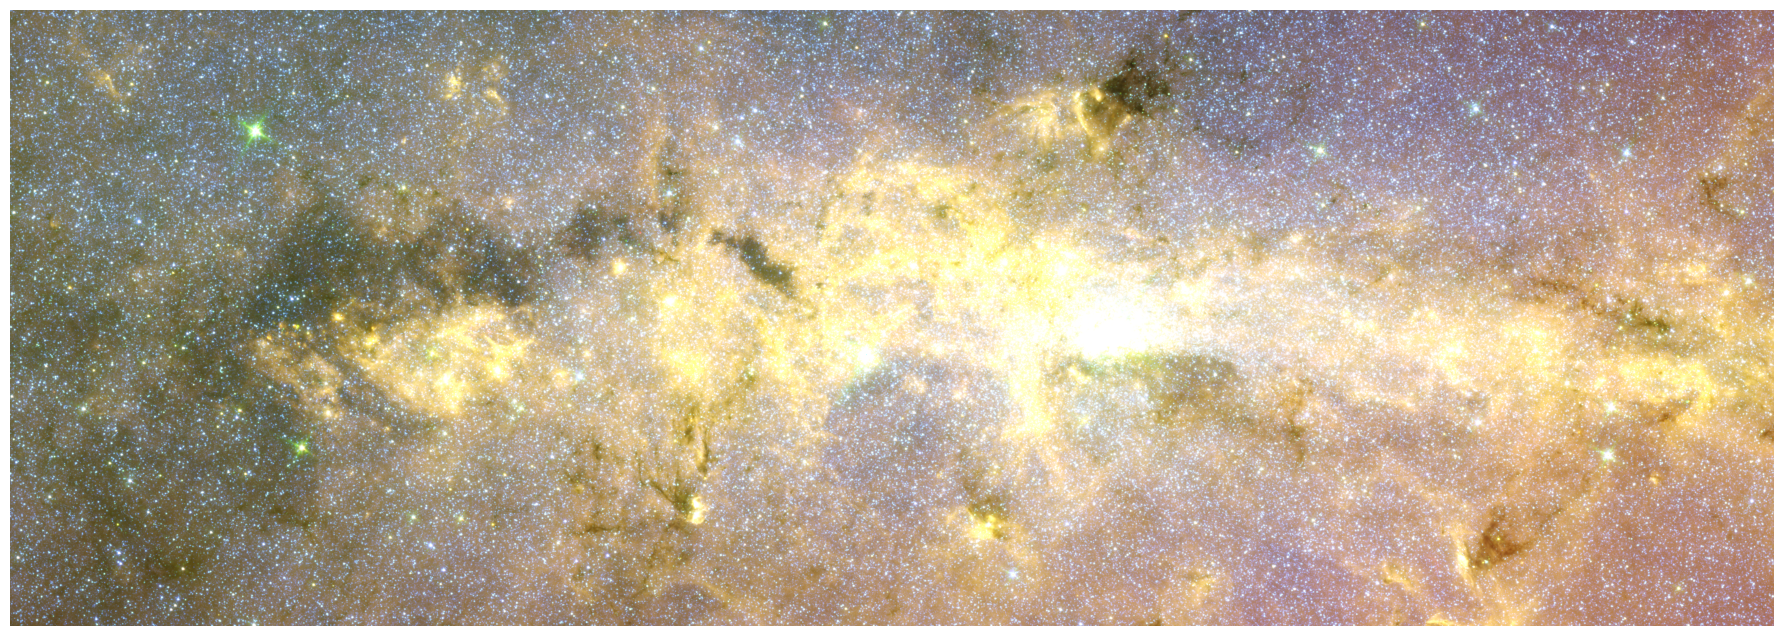

In [45]:
fig = plt.figure(figsize=(24, 8))
ax = plt.subplot(111, projection=spit_wcs)
ax.imshow(spit_rgb)
#ax.set_xlabel('Galactic Longitude')
#ax.set_ylabel('Galactic Latitude')
ax.set_axis_off()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 1635.5)

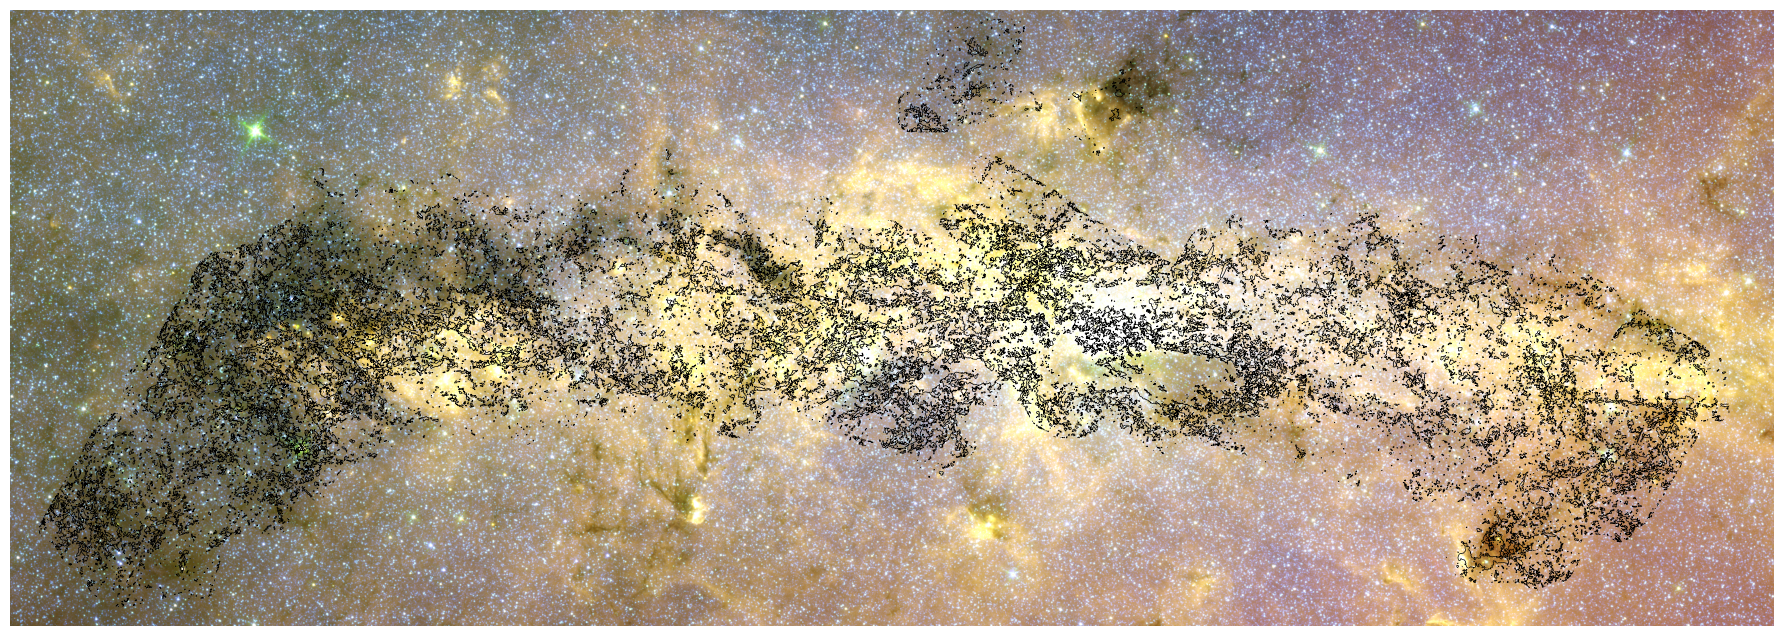

In [14]:
fig = plt.figure(figsize=(24, 8))
ax = plt.subplot(111, projection=spit_wcs)
ax.imshow(spit_rgb)
right, left = ax.get_xlim()
top, bottom = ax.get_ylim()
#ax.set_xlabel('Galactic Longitude')
#ax.set_ylabel('Galactic Latitude')
ax.contour(mom0_CS_cutout.data, levels=get_percentile_list(mom0_CS_cutout.data, percents=[80]), colors='k', linewidths=0.5, transform=ax.get_transform(mom0_CS_cutout.wcs))
ax.set_axis_off()
ax.set_xlim(right, left)
ax.set_ylim(top, bottom)

# 3 Color - R: ACES CS 2-1 G: Herchel B: Spitzer

In [30]:
max_CS_fn = '/orange/adamginsburg/ACES/mosaics/cubes/moments/CS21_CubeMosaic_max.fits'
cutout_CS = cm.get_cutout(max_CS_fn, pos_spit, l, w)

In [31]:
ax = plt.subplot(111, projection=cutout_CS.wcs)
im = ax.imshow(cutout_CS.data, cmap='Greys')

In [ ]:
herschel_fn = '/orange/adamginsburg/cmz/herschel/destripe_l000_PSW_wgls_rcal.fits'
cutout_herschel = cm.get_cutout(herschel_fn, pos_spit, l, w)

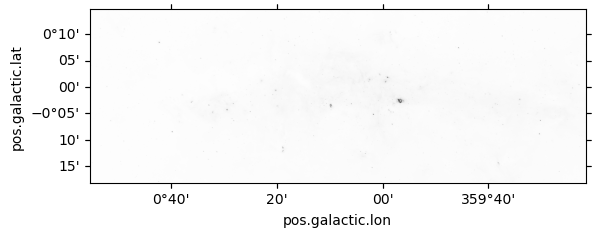

In [ ]:
ax = plt.subplot(111, projection=cutout_herschel.wcs)
im = ax.imshow(cutout_herschel.data, cmap='Greys')

In [26]:
spitzer_fn = '/orange/adamginsburg/cmz/glimpse_data/GLM_00000+0000_mosaic_I4.fits'
cutout_spitzer = cm.get_cutout(spitzer_fn, pos_spit, l, w)

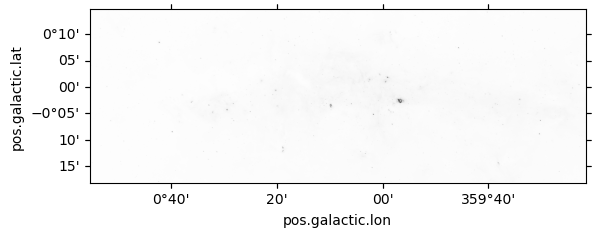

In [29]:
ax = plt.subplot(111, projection=spitzer_fn.wcs)
im = ax.imshow(spitzer_fn.data, cmap='Greys')